In [ ]:
#import sys
#from google.colab import drive
#drive.mount('/content/drive')
#!git clone https://github.com/Gio99c/BiSeNet.git
#!pip install tensorboardX

In [ ]:
#%cd /content/BiSeNet
#!python train.py

##### Extraction of info from the json file

In [3]:
import json
 
# Opening JSON file
f = open('./data/Cityscapes/info.json')
 
# returns JSON object as
# a dictionary
data = json.load(f)

In [5]:
label2train = data['label2train']
label2train_dict = {el[0]:el[1] for el in label2train }
label2train_dict

{0: 255,
 1: 255,
 2: 255,
 3: 255,
 4: 255,
 5: 255,
 6: 255,
 7: 0,
 8: 1,
 9: 255,
 10: 255,
 11: 2,
 12: 3,
 13: 4,
 14: 255,
 15: 255,
 16: 255,
 17: 5,
 18: 255,
 19: 6,
 20: 7,
 21: 8,
 22: 9,
 23: 10,
 24: 11,
 25: 12,
 26: 13,
 27: 14,
 28: 15,
 29: 255,
 30: 255,
 31: 16,
 32: 17,
 33: 18,
 -1: 255}

##### Prepare the paths

In [6]:
#Get the labels images
import numpy as np
from pathlib import Path

labels_paths = []
labels_list = np.array(sorted(Path('data\Cityscapes\labels').glob("*")))
val_samples = [l.split("/")[1] for l in np.loadtxt(f"data/Cityscapes/val.txt", dtype="unicode")]

for img in labels_list:
    modified_label = str(img).split("\\")[-1].replace("_gtFine_labelIds.png", "_leftImg8bit.png") #the replace operation is needed beacuse labels file have different names wrt the images    
    if modified_label in val_samples:
        labels_paths.append(str(img))

In [7]:
def map(image, label2train):
    """
    image: matrix to map
    label2train: dictionary indicating the mapping
    """
    new_image = image.copy()
    for i in range(new_image.shape[0]):
        for j in range(new_image.shape[1]):
            new_image[i,j] = label2train_dict[new_image[i][j]]
    return new_image
   

#### Map function and test

In [8]:
#Map test
np.random.seed(1)
img = np.random.randint(-1,34, size=(5,5))
new_image = map(img, label2train_dict)
new_image

array([[  2,   0,   1, 255, 255],
       [255, 255, 255, 255,   2],
       [255, 255,  11,   6,   5],
       [  6, 255,  14,  15,   4],
       [255,   9,   9, 255,  16]])

In [9]:
from PIL import Image
img = Image.open(labels_paths[0])
new_img = map(np.array(img), label2train_dict)

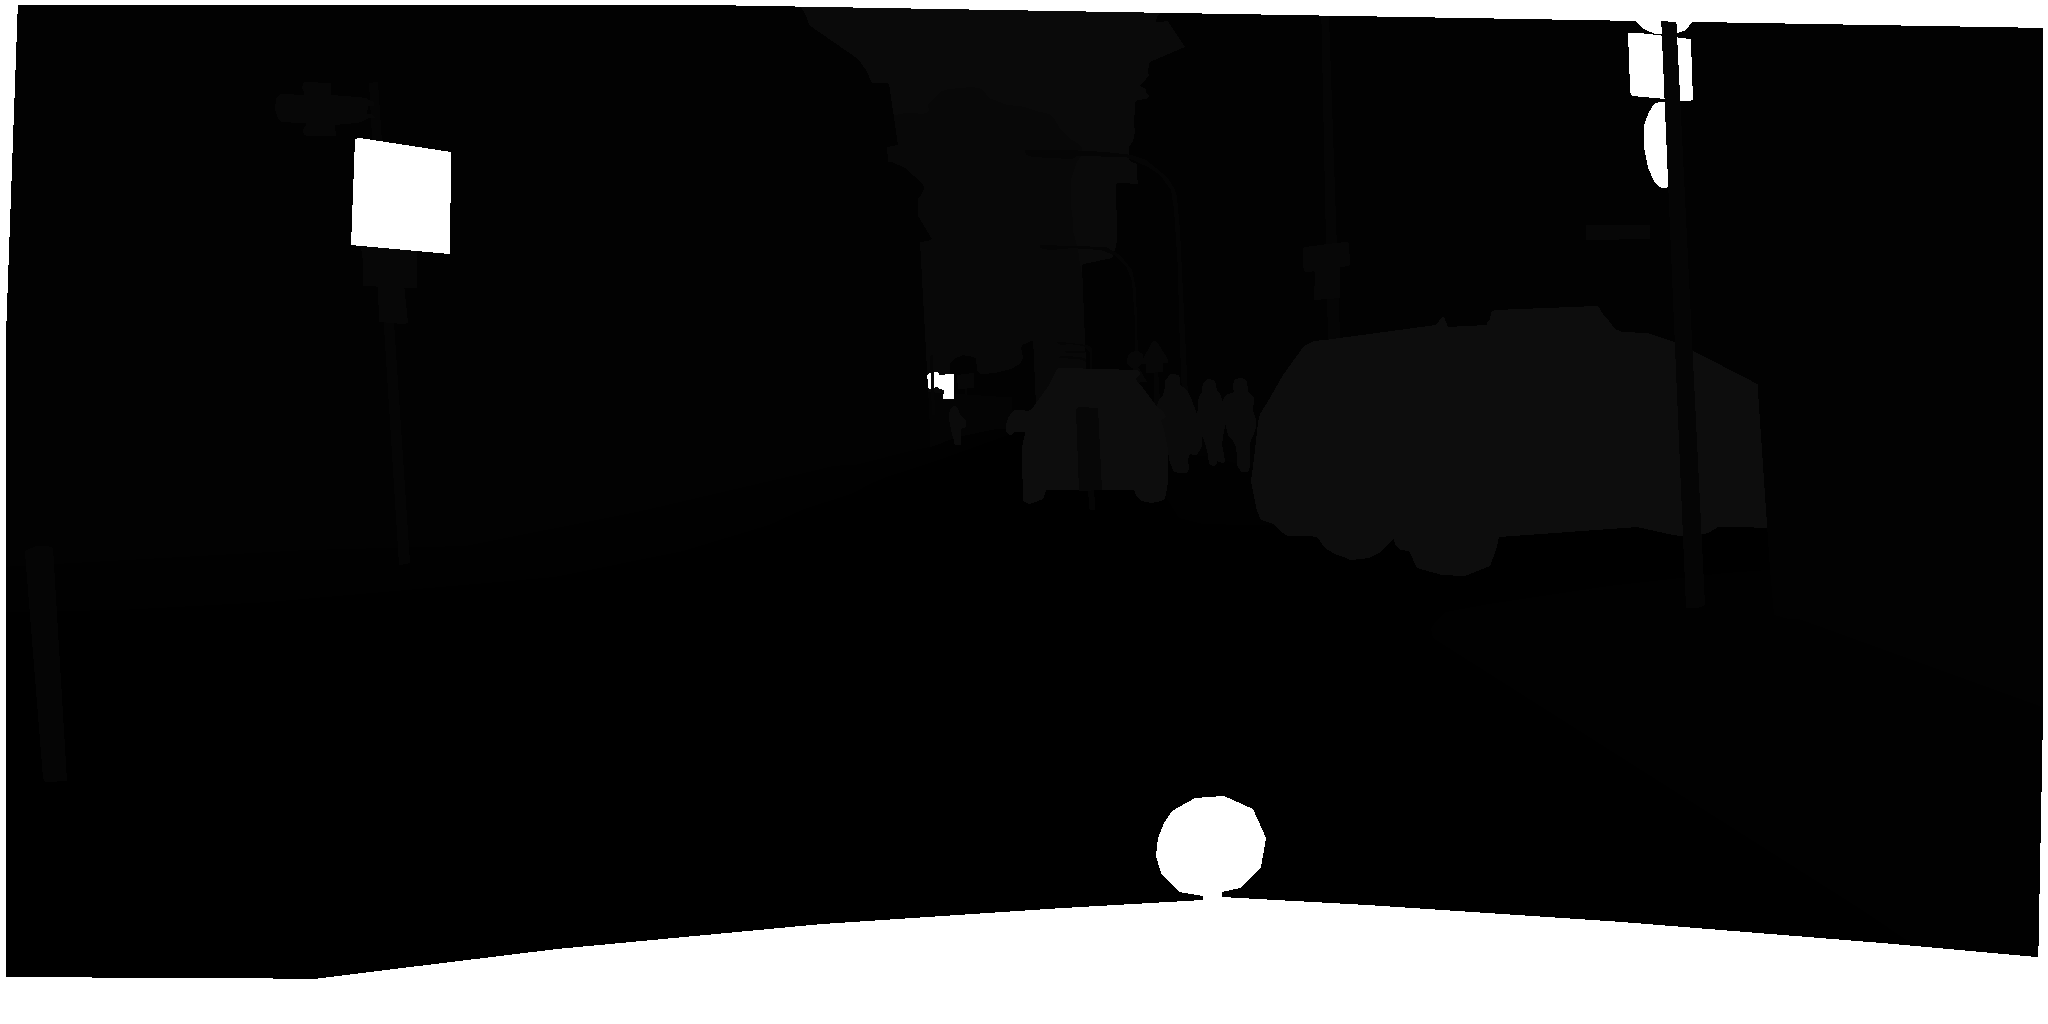

In [10]:
import torchvision
toPil = torchvision.transforms.ToPILImage(mode=None)
l = toPil(new_img)
l

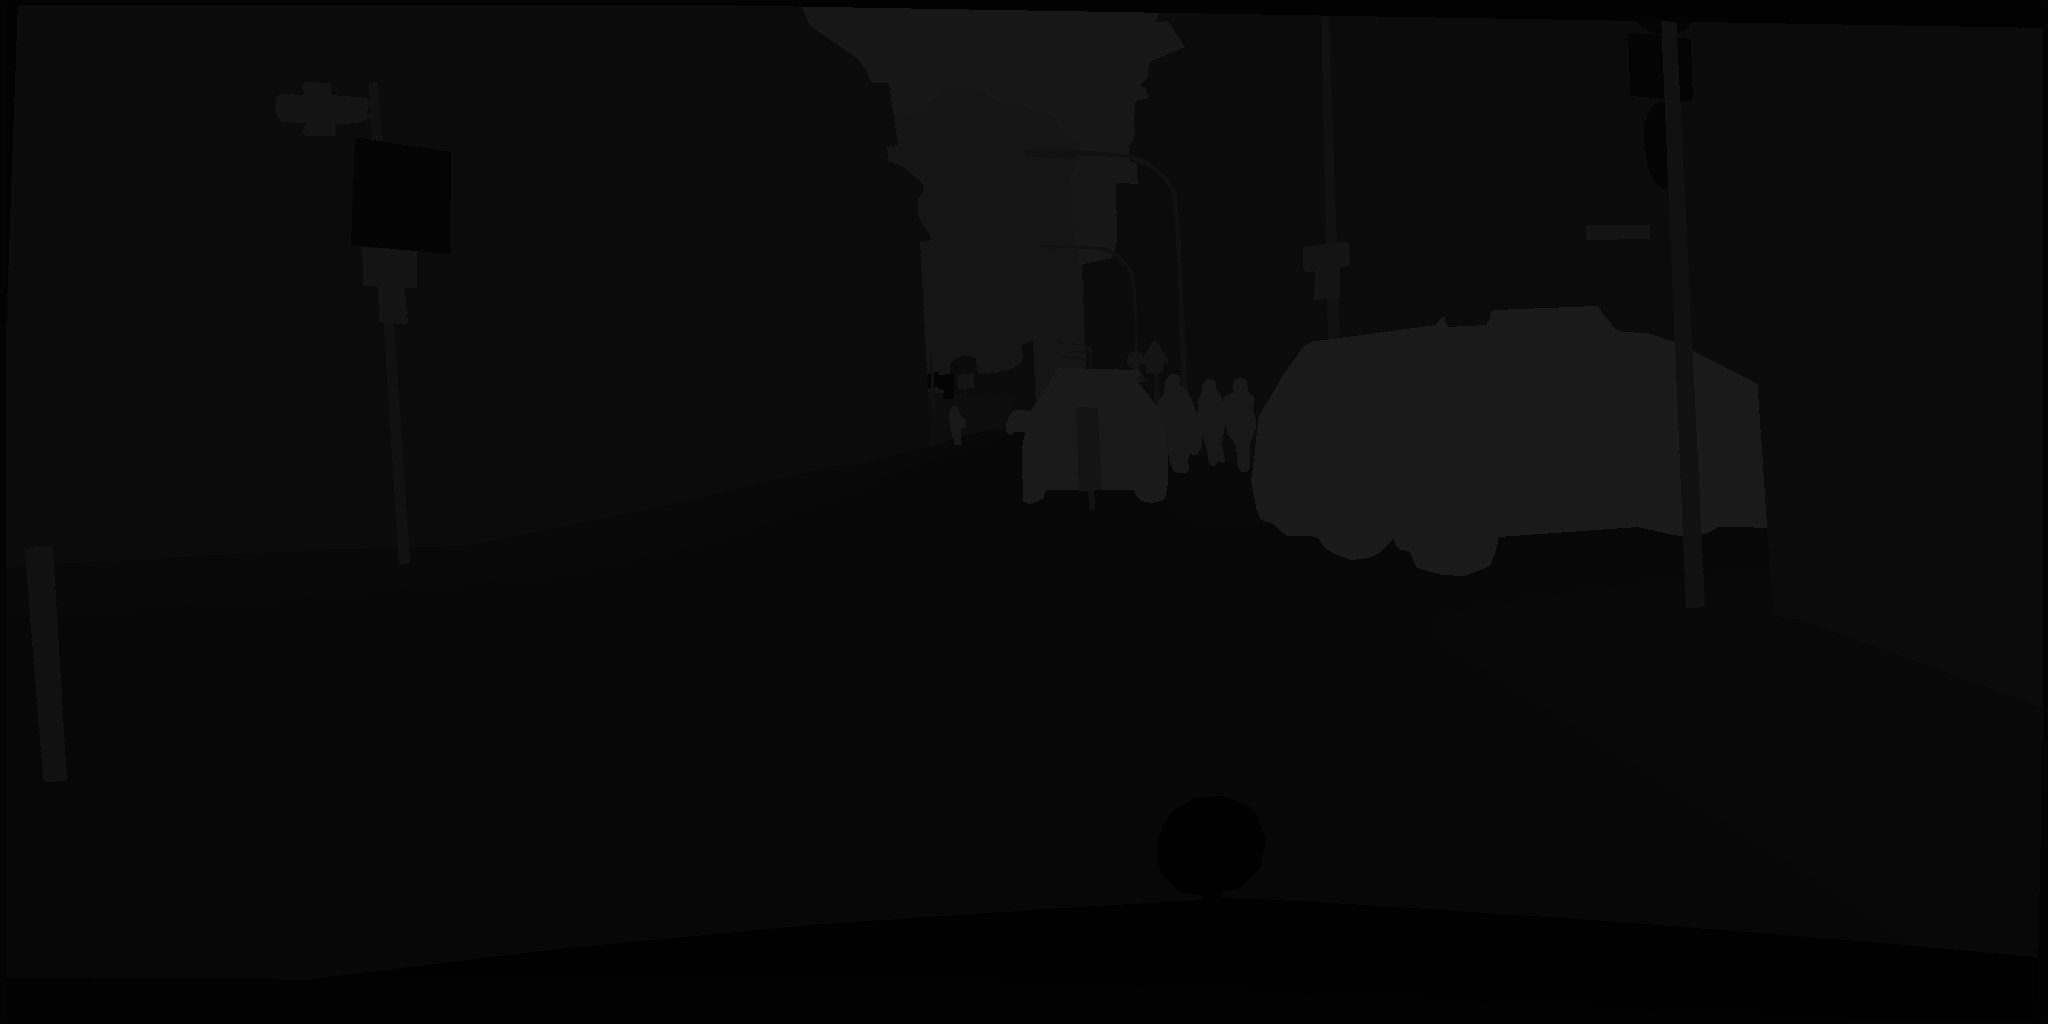

In [11]:
img

#### Map the labels

In [12]:
converted_labels = []
for img_path in labels_paths:
    img = Image.open(img_path)
    new_img = map(np.array(img), label2train_dict)
    converted_labels.append(new_img)

len(converted_labels)

250

Save the modified labels in a folder

In [13]:
for i, conv_label in enumerate(converted_labels):
    l_path = labels_paths[i].replace("labels", "val_modified_labels")
    im = Image.fromarray(conv_label)
    l_path = Path(l_path)
    im.save(l_path)
    
